In [1]:
# Import libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# define paths, constants etc. 
datadir = "../dataset/mbti-type/"
datafile = "../dataset/mbti-type/mbti_1.csv"

# Open dataset

In [3]:
# Opening dataset as pandas dataframe 
df = pd.read_csv(datafile)

In [4]:
print("There are %d number of data "  %len(df))

There are 8675 number of data 


In [5]:
# Looking the first 5 elements 
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
# How many different type in the dataset?
print("There are %d number of different classes " %len(df.type.unique())) 
print("The classes are : ")
print(df.type.unique())

There are 16 number of different classes 
The classes are : 
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


Text(0, 0.5, 'Number of Posts')

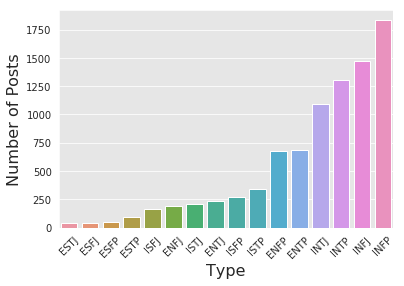

In [7]:
# How many example in each classes? 
df_sorted = df.groupby(['type'], sort=True).count().sort_values(['posts'])
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(x=df_sorted.index, y="posts", data=df_sorted)
#g.set_xticklabels(rotation=90,labels = df_sorted.index)
plt.xticks(rotation=45)
plt.xlabel("Type", fontsize = 16 )
plt.ylabel("Number of Posts", fontsize =16)

In [8]:
df_sorted.head()

,posts
type,
ESTJ,39
ESFJ,42
ESFP,48
ESTP,89
ISFJ,166


In [8]:
# What is the number of words in each post by groups? 
#df['word_count'] = df['posts'].str.split().str.len()
#df['word_count_by_post'] = df['word_count']/50.0

In [9]:
# find the number of words in each row by groups 
#df_by_word = df.groupby(['type'], sort=True).sum().sort_values(['word_count'])
# rename columns to concatenate with the group_by dataframe 
#df_by_word.rename({'word_count':'word_sum', 'word_count_by_post':'word_sum_by_post'},inplace=True)

In [32]:
#df_concat = pd.concat([df_sorted,df_by_word],axis=1,sort=True)
#df_concat.head()

,posts,word_count,word_count_by_post
ENFJ,190,244451,4889.02
ENFP,675,851020,17020.40
ENTJ,231,281378,5627.56
ENTP,685,826107,16522.14
ESFJ,42,54200,1084.00


In [43]:
#df_concat['avg_word_count'] = df_concat['word_count']/df_concat['posts']
#df_concat['avg_word_count_by_post'] = df_concat['word_count_by_post']/df_concat['posts']

Text(0, 0.5, 'Average Number of Word')

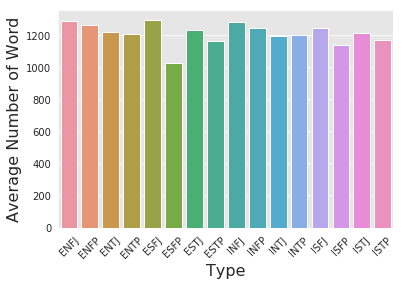

In [44]:
sns.barplot(df_concat.index, "avg_word_count", data=df_concat)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#g.set_xticklabels(rotation=90,labels = df_sorted.index)
plt.xticks(rotation=45)
plt.xlabel("Type", fontsize = 16 )
plt.ylabel("Average Number of Word", fontsize =16)

In [9]:
df['is_E'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['is_S'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['is_T'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
df['is_J'] = df['type'].apply(lambda x: 1 if x[3] == 'J' else 0)
#df.columns = ['type','is_E','is_S','is_T','is_J']
#df.head()


In [28]:
df_new = df.iloc[:,2:].sum()

Text(0, 0.5, 'Number of rows')

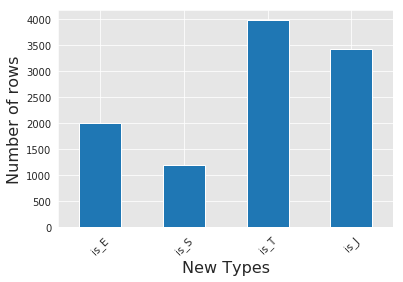

In [38]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
df_new.plot.bar()
plt.xticks(rotation=45)
plt.xlabel("New Types", fontsize = 16 )
plt.ylabel("Number of rows", fontsize =16)

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

etc = ExtraTreesClassifier(n_estimators = 20, max_depth=4, n_jobs = -1)
tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tsvd = TruncatedSVD(n_components=10)
model = Pipeline([('tfidf1', tfidf), ('tsvd1', tsvd), ('etc', etc)])

In [41]:
from sklearn.model_selection import StratifiedKFold

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [44]:
import numpy as np
from sklearn.model_selection import cross_validate
np.random.seed(1)

scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

results = cross_validate(model, df['posts'], df['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)



In [45]:


print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results['test_acc']),
                                                          np.std(results['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results['test_f1_micro']),
                                                          np.std(results['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results['test_neg_log_loss']),
                                                          np.std(-1*results['test_neg_log_loss'])))



CV Accuracy: 0.2953 (+/- 0.0220)
CV F1: 0.2953 (+/- 0.0220)
CV Logloss: 2.1401 (+/- 0.0150)


In [46]:
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    return text


In [50]:
np.random.seed(1)
from sklearn.naive_bayes import MultinomialNB

tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)

model_nb = Pipeline([('tfidf1', tfidf2), ('nb', MultinomialNB())])

results_nb = cross_validate(model_nb, df['posts'], df['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [52]:


print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_acc']),
                                                          np.std(results_nb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_f1_micro']),
                                                          np.std(results_nb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_nb['test_neg_log_loss']),
                                                          np.std(-1*results_nb['test_neg_log_loss'])))



CV Accuracy: 0.5392 (+/- 0.0100)
CV F1: 0.5392 (+/- 0.0100)
CV Logloss: 7.1822 (+/- 0.2744)


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1, 1), stop_words='english',
                                                 lowercase = True, max_features = 5000)

model_lr = Pipeline([('tfidf1', tfidf2), ('lr', LogisticRegression(class_weight="balanced", C=0.005))])

results_lr = cross_validate(model_lr, df['posts'], df['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)



In [57]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_acc']),
                                                          np.std(results_lr['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_f1_micro']),
                                                          np.std(results_lr['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_lr['test_neg_log_loss']),
                                                          np.std(-1*results_lr['test_neg_log_loss'])))

CV Accuracy: 0.6726 (+/- 0.0105)
CV F1: 0.6726 (+/- 0.0105)
CV Logloss: 1.2285 (+/- 0.0233)
